In [1]:
import pandas as pd
import numpy as np
import re
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# RANDOM ALL

In [3]:
file_name = '../paper_v2/2_1-2_1-2_1-1.csv'

qaoa_results = pd.read_csv(file_name, header=0, usecols=['QAOA', 'WFQAOA', 'HQAOA'], sep=';', skiprows=[0])
qaoa_results

,QAOA,WFQAOA,HQAOA
0,-0.469,-1.688,-1.592
1,-0.408,-1.646,-1.168
2,-0.840,-0.989,-1.390
3,-0.366,-1.419,-1.637
4,-0.433,-2.003,-1.308
...,...,...,...
9995,-0.672,-1.330,-1.316
9996,-1.023,-1.668,-1.176
9997,-1.608,-1.107,-1.307
9998,-0.992,-1.085,-0.997


In [4]:
def calulcate_mean_std(df, samples):
    shuffled = df.iloc[np.random.permutation(len(df))]
    results = []
    for sample in np.array_split(shuffled, len(shuffled)//samples):
        results.append(sample.min())
    
    return np.array(results)

qaoa_df_as_array = []
# ['samples', 'mean', 'std']
for samples in [10, 50, 100, 200, 250, 500, 1000]:
    results = calulcate_mean_std(qaoa_results, samples)
    means, stds = results.mean(axis=0), results.std(axis=0)
    qaoa_df_as_array.append(['RANDOM QAOA', samples, means[0], stds[0]])
    qaoa_df_as_array.append(['RANDOM WF-QAOA', samples, means[1], stds[1]])
    qaoa_df_as_array.append(['RANDOM H-QAOA', samples, means[2], stds[2]])
qaoa_df = pd.DataFrame(qaoa_df_as_array, columns=['method', 'samples', 'mean', 'std'])
qaoa_df

,method,samples,mean,std
0,RANDOM QAOA,10,-1.424915,0.275228
1,RANDOM WF-QAOA,10,-1.985246,0.248826
2,RANDOM H-QAOA,10,-1.865248,0.246196
3,RANDOM QAOA,50,-1.765965,0.215438
4,RANDOM WF-QAOA,50,-2.301865,0.189316
5,RANDOM H-QAOA,50,-2.174530,0.220846
6,RANDOM QAOA,100,-1.870200,0.215317
7,RANDOM WF-QAOA,100,-2.388770,0.179456
8,RANDOM H-QAOA,100,-2.283010,0.213980
9,RANDOM QAOA,200,-2.005020,0.195613


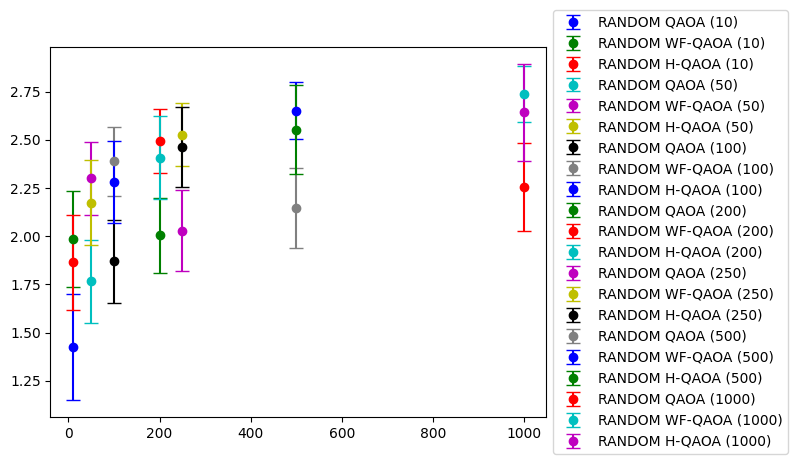

In [5]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray'] * 10

for x, y, yerr, method, color in zip(
    qaoa_df['samples'],
    -qaoa_df['mean'],
    qaoa_df['std'],
    qaoa_df['method'],
    colors,
):
    plt.errorbar(
        x, y, yerr, ecolor=color, linestyle='None', marker='o',
        color=color, capsize=5, label=f"{method} ({x})")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Basinhopping

In [6]:
import re

dir_with_results = '../paper_bh/'
bh_results = pd.DataFrame(columns=['method', 'mean', 'std', 'samples'])
for filename in os.listdir(dir_with_results):
    m = re.search(r'bh_(\d+)[\w\-]+.csv', filename)
    if not m or '1000' not in filename:
        continue
    data = pd.read_csv(os.path.join(dir_with_results, filename), header=0, usecols=['BH_WFQAOA', 'BH_HQAOA'], sep=';', skiprows=[0])
    bh_df = []
    means, stds = data.mean(), data.std()
    print(data)
    bh_df.append(['BASIN-HOPPING WF-QAOA', int(m.group(1)), means[0], stds[0]])
    bh_df.append(['BASIN-HOPPING H-QAOA', int(m.group(1)), means[1], stds[1]])
    bh_results = pd.concat([bh_results, pd.DataFrame(bh_df, columns=['method', 'samples', 'mean', 'std'])], ignore_index=True)
bh_results

   BH_WFQAOA  BH_HQAOA
0     -2.564    -2.646
1     -2.432    -2.579
2     -2.497    -2.683
3     -3.236    -2.843
4     -2.721    -2.917
5     -2.256    -2.475
6     -2.563    -2.850
7     -2.592    -2.570
8     -2.561    -3.079
9     -2.456    -2.319


,method,mean,std,samples
0,BASIN-HOPPING WF-QAOA,-2.5878,0.258157,1000
1,BASIN-HOPPING H-QAOA,-2.6961,0.227073,1000


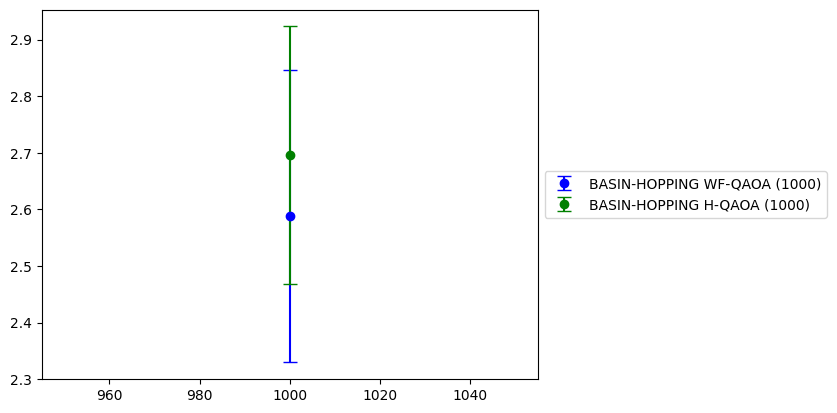

In [7]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray'] * 10

for x, y, yerr, method, color in zip(
    bh_results['samples'],
    -bh_results['mean'],
    bh_results['std'],
    bh_results['method'],
    colors,
):
    plt.errorbar(
        x, y, yerr, ecolor=color, linestyle='None', marker='o',
        color=color, capsize=5, label=f"{method} ({x})")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
def calulcate_mean_std(file_name, samples):
    data = pd.read_csv(os.path.join(dir_with_results, file_name), header=0, usecols=['BH_WFQAOA', 'BH_HQAOA'], sep=';', skiprows=[0])
    shuffled = data.iloc[np.random.permutation(len(data))]
    results = []
    for sample in np.array_split(shuffled, len(shuffled)//samples):
        results.append(sample.min())
    return np.array(results)

bh_df_as_array = []

for iter_per_point, samples in [
    (10, 1), (10, 5), (10, 10), (10, 20), (10, 25), (10, 50), (10, 100), 
    (50, 1), (50, 2), (50, 4), (50, 5), (50, 10), (50, 20),
    (100, 1), (100, 2), (100, 5), (100, 10),
    (200, 1), (200, 5),
    (250, 1), (250, 2), (250, 4),
    (500, 1), (500, 2),
    (1000, 1)]:
    file_name = f'bh_{iter_per_point}_2_1-2_1-2_1-1.csv'
    results = calulcate_mean_std(file_name, samples)
    means, stds = results.mean(axis=0), np.std(results, ddof=1, axis=0)
    bh_df_as_array.append(['BASIN-HOPPING WF-QAOA', iter_per_point * samples, iter_per_point, samples, means[0], stds[0]])
    bh_df_as_array.append(['BASIN-HOPPING H-QAOA', iter_per_point * samples, iter_per_point, samples, means[1], stds[1]])
bh_df = pd.DataFrame(bh_df_as_array, columns=['method','samples', 'iter_per_point' ,'init_points', 'mean', 'std'])
bh_df.sort_values('mean')

,method,samples,iter_per_point,init_points,mean,std
36,BASIN-HOPPING WF-QAOA,1000,200,5,-2.881100,0.218179
43,BASIN-HOPPING H-QAOA,1000,250,4,-2.828800,0.104639
13,BASIN-HOPPING H-QAOA,1000,10,100,-2.812200,0.201328
25,BASIN-HOPPING H-QAOA,1000,50,20,-2.782900,0.319797
12,BASIN-HOPPING WF-QAOA,1000,10,100,-2.779900,0.212397
24,BASIN-HOPPING WF-QAOA,1000,50,20,-2.771200,0.132054
37,BASIN-HOPPING H-QAOA,1000,200,5,-2.747000,0.269396
33,BASIN-HOPPING H-QAOA,1000,100,10,-2.726100,0.167732
46,BASIN-HOPPING WF-QAOA,1000,500,2,-2.708000,0.168194
49,BASIN-HOPPING H-QAOA,1000,1000,1,-2.696100,0.227073


In [9]:
idx = (bh_df.groupby(['samples', 'method'])['mean', 'method'].transform(min) == bh_df[['mean', 'method']]).all(axis=1)
bh_df[idx].sort_values('mean')

/tmp/ipykernel_7640/3121501042.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  idx = (bh_df.groupby(['samples', 'method'])['mean', 'method'].transform(min) == bh_df[['mean', 'method']]).all(axis=1)


,method,samples,iter_per_point,init_points,mean,std
36,BASIN-HOPPING WF-QAOA,1000,200,5,-2.881100,0.218179
43,BASIN-HOPPING H-QAOA,1000,250,4,-2.828800,0.104639
10,BASIN-HOPPING WF-QAOA,500,10,50,-2.647900,0.221752
41,BASIN-HOPPING H-QAOA,500,250,2,-2.639400,0.213028
9,BASIN-HOPPING H-QAOA,250,10,25,-2.553850,0.214365
8,BASIN-HOPPING WF-QAOA,250,10,25,-2.514775,0.230689
7,BASIN-HOPPING H-QAOA,200,10,20,-2.498480,0.249390
34,BASIN-HOPPING WF-QAOA,200,200,1,-2.485040,0.272594
5,BASIN-HOPPING H-QAOA,100,10,10,-2.378660,0.250539
16,BASIN-HOPPING WF-QAOA,100,50,2,-2.362460,0.210438


# GRAPHS

In [10]:
qaoa_df_copy = qaoa_df.copy()

basinhopping_copy = bh_df[idx].copy()
all_df = pd.concat([qaoa_df_copy, basinhopping_copy])

# all_df['samples'] = all_df['weights']*all_df['angles']
all_df.sort_values(['method', 'samples'])

,method,samples,mean,std,iter_per_point,init_points
1,BASIN-HOPPING H-QAOA,10,-1.894563,0.265420,10.0,1.0
3,BASIN-HOPPING H-QAOA,50,-2.230455,0.251700,10.0,5.0
5,BASIN-HOPPING H-QAOA,100,-2.378660,0.250539,10.0,10.0
7,BASIN-HOPPING H-QAOA,200,-2.498480,0.249390,10.0,20.0
9,BASIN-HOPPING H-QAOA,250,-2.553850,0.214365,10.0,25.0
41,BASIN-HOPPING H-QAOA,500,-2.639400,0.213028,250.0,2.0
43,BASIN-HOPPING H-QAOA,1000,-2.828800,0.104639,250.0,4.0
0,BASIN-HOPPING WF-QAOA,10,-1.939424,0.243764,10.0,1.0
2,BASIN-HOPPING WF-QAOA,50,-2.238315,0.215229,10.0,5.0
16,BASIN-HOPPING WF-QAOA,100,-2.362460,0.210438,50.0,2.0


In [21]:
# colors_by_method = {
#     'RANDOM H-QAOA': '#f4d171',
#     'RANDOM WF-QAOA': '#a0f8a6',
#     'RANDOM QAOA': '#85cdfa',
#     'BASIN-HOPPING H-QAOA': '#eeba2b',
#     'BASIN-HOPPING WF-QAOA': '#70f579'
# }

colors_by_method = {
    'RANDOM QAOA': '#85258F',
    'RANDOM WF-QAOA': '#0191FF',
    'RANDOM H-QAOA': '#FF6701',
    'BASIN-HOPPING WF-QAOA': '#00C173',
    'BASIN-HOPPING H-QAOA': '#FFD300',
}
marker_by_method = {
    'RANDOM H-QAOA': 'v',
    'RANDOM WF-QAOA': 's',
    'RANDOM QAOA': 'o',
    'BASIN-HOPPING H-QAOA': '^',
    'BASIN-HOPPING WF-QAOA': 'D'
}
add_by_method = {
    'RANDOM H-QAOA': 0.10,
    'RANDOM WF-QAOA': 0.05,
    'RANDOM QAOA': -0.05,
    'BASIN-HOPPING H-QAOA': 0,
    'BASIN-HOPPING WF-QAOA': -0.1
}
value_by_idx = {
    10: 1.5,
    50: 2.5,
    100: 3.5,
    200: 4.5,
    250: 5.5,
    500: 6.5,
    1000: 7.5
}

                   method  samples      mean       std
0             RANDOM QAOA       10 -1.424915  0.275228
1          RANDOM WF-QAOA       10 -1.985246  0.248826
2           RANDOM H-QAOA       10 -1.865248  0.246196
3             RANDOM QAOA       50 -1.765965  0.215438
4          RANDOM WF-QAOA       50 -2.301865  0.189316
5           RANDOM H-QAOA       50 -2.174530  0.220846
6             RANDOM QAOA      100 -1.870200  0.215317
7          RANDOM WF-QAOA      100 -2.388770  0.179456
8           RANDOM H-QAOA      100 -2.283010  0.213980
9             RANDOM QAOA      200 -2.005020  0.195613
10         RANDOM WF-QAOA      200 -2.494160  0.165455
11          RANDOM H-QAOA      200 -2.407500  0.215539
12            RANDOM QAOA      250 -2.029425  0.209145
13         RANDOM WF-QAOA      250 -2.527925  0.162083
14          RANDOM H-QAOA      250 -2.463650  0.206686
15            RANDOM QAOA      500 -2.146800  0.209225
16         RANDOM WF-QAOA      500 -2.651750  0.148059
17        

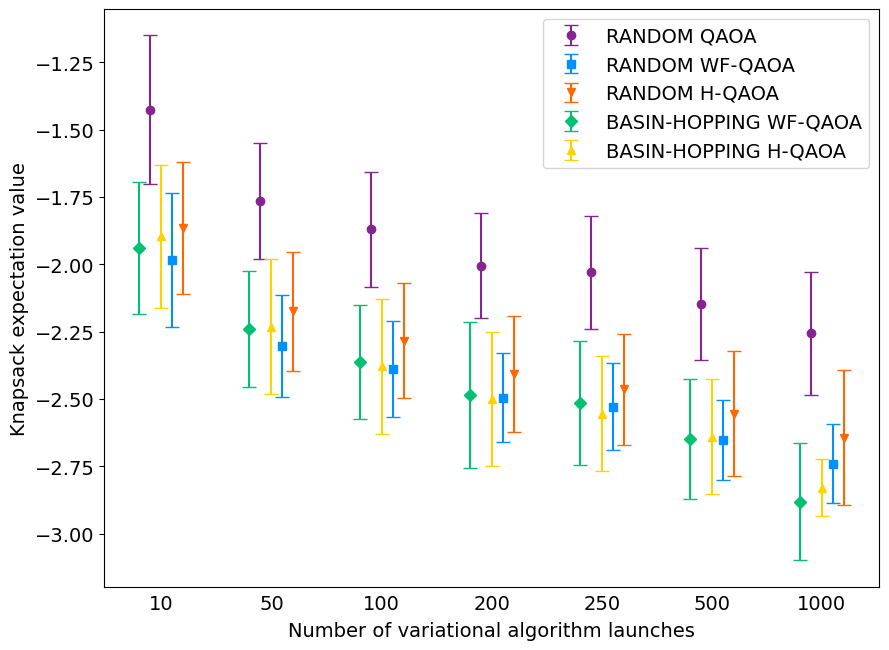

In [22]:
min_values = pd.DataFrame(all_df.groupby(['method', 'samples'])['mean'].min()).reset_index()
# min_values
data = all_df.merge(min_values, on=['method', 'samples'],suffixes=('', '_min'))
data = data[data['mean']==data['mean_min']]
print(data[['method', 'samples', 'mean', 'std']])
plt.figure(figsize=(10, 7.5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray']*10
prev_labels = set()
for row, color in zip(data.iterrows(), colors):
    row = row[1]
    # if row['mean'] > -2:
    #     continue
    plt.errorbar(
        x=value_by_idx[int(row['samples'])] + add_by_method[row['method']]*2, 
        y=row['mean'], 
        yerr=row['std'], 
        # label=f"{row['method']} ({int(row['weights'])}, {int(row['angles'])})",
        label=f"{row['method']}" if row['method'] not in prev_labels else "",
        ecolor=colors_by_method[row['method']], color=colors_by_method[row['method']],
        linestyle='None', marker=marker_by_method[row['method']], capsize=5)
    prev_labels.add(row['method'])
plt.rcParams['font.size'] = '14'
plt.legend(loc='upper right') #, bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of variational algorithm launches', fontsize=14)
plt.ylabel('Knapsack expectation value', fontsize=14)
plt.xticks(ticks=[x-0.5 for x in value_by_idx.values()], color='w')
plt.xticks(ticks=list(value_by_idx.values()), labels=list(value_by_idx.keys()), minor=True)
plt.tick_params(bottom=False, which='both')
# plt.show()
plt.savefig('best_results.pdf', bbox_inches='tight')